<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW5/fabulaIDS_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS HW 5
##Owen Fabula
##Problem 1 (Python)

###Part 1: Import data and deal with any missing values
To begin my work, I first imported various useful libraries and the raw csv file on GitHub.

In [ ]:
import pandas as pd
import numpy as np

wine = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv", sep=",")
wine

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


To check if there were any missing values, I did the following:

In [ ]:
#checks whole dataframe
print("missing values in whole dataframe:",wine.isna().values.any());

missing values in whole dataframe: False


From the above, we can see that there are not any missing values like np.NaN or NA or null, and from multiple inspections of the raw csv file, there do not appear to be any special placeholder or erroneously entered values. As such, work on this data set may commence.

###Part 2: Label encoding
Each attribute in the original data set is categoric, so we have to convert the categoric values to numeric values in order to prep the data for modeling. To do this, I used the following code:

In [ ]:
from sklearn import preprocessing

#make label encoder
en = preprocessing.LabelEncoder()

#new empty dataframe
encoded_wine = pd.DataFrame()

#for each categoric attribute (all in orginal dataframe)
for i in range(0, wine.shape[1]):
  encoded_wine[wine.columns[i]] = en.fit_transform(wine[wine.columns[i]])

#print encoded dataframe
print(encoded_wine)

      Type  Alcohol_flag  Sugar_flag
0        0             0           0
1        0             0           1
2        0             1           0
3        0             0           1
4        0             1           1
...    ...           ...         ...
3340     1             0           0
3341     1             0           1
3342     1             0           1
3343     1             0           1
3344     1             0           1

[3345 rows x 3 columns]


###Part 3: Creating and plotting contingency tables
To create a contingency table between the type and alcohol content columns, I used the below code. I decided to make two contingency tables for each relation: one with marginal calculations, and one without. I did this because it looked better to plot the cross tabulations without margins, but the marginal calculations were still ultimately useful to me elsewhere.

In [ ]:
#create contingency table with margins
type_alc_margins = pd.crosstab(wine.Type, wine.Alcohol_flag, margins=True)
#create contingency table without margins
type_alc = pd.crosstab(wine.Type, wine.Alcohol_flag)
print(type_alc_margins)

Alcohol_flag  High   Low   All
Type                          
Red            485   600  1085
White         1176  1084  2260
All           1661  1684  3345


To create a contingency table between type and sugar content columns, I used the following code:

In [ ]:
#create contingency table with margins
type_sugar_margins = pd.crosstab(wine.Type, wine.Sugar_flag, margins=True)
#create contingency table without margins
type_sugar = pd.crosstab(wine.Type, wine.Sugar_flag)
print(type_sugar_margins)

Sugar_flag  High   Low   All
Type                        
Red          237   848  1085
White       1382   878  2260
All         1619  1726  3345


To plot the two above contingency tables, I used the following code:

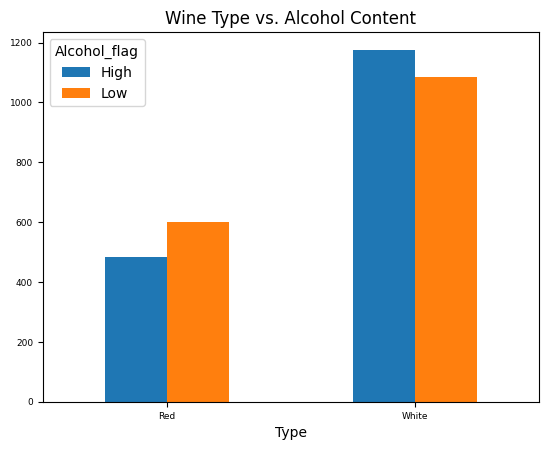

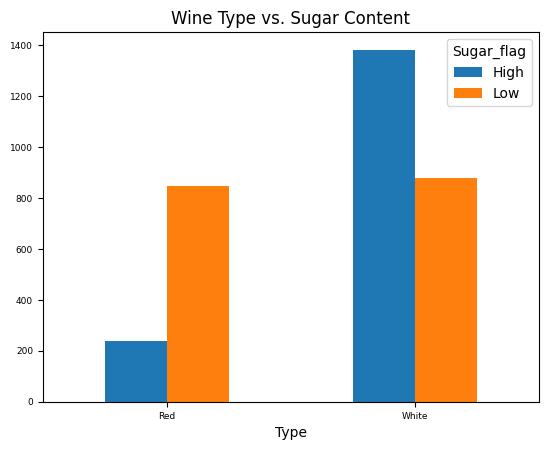

In [ ]:
barplot = type_alc.plot.bar(title="Wine Type vs. Alcohol Content",rot=0,fontsize=6.5)
barplot = type_sugar.plot.bar(title="Wine Type vs. Sugar Content",rot=0,fontsize=6.5)

From the above output, we can draw a few conclusions. First, white wine simply has more representation in the original data set than red wine. We can also see that red wines have more entries with low than high sugar, and red wines also have more entries with low than high alcohol content. On the contrary, white wines have greater representation in the high sugar and high alcohol content attributes than white wines with low sugar and white wines with high alcohol content.

###Part 4: Calculating probabilities
To calculate the specified probabilities, I used the below steps. All calculations are based on the above contingency tables:<ul><li>Prior probability of red and white wine:<ul><li>P(Red) = 1085/3345 = 0.324</li><li>P(White) = 2260/3345 = 0.676</li></ul></li><li>Probability of high and low alcohol content:<ul><li>P(high_alcohol) = 1661/3345 = 0.497</li><li>P(low_alcohol) = 1684/3345 = 0.503</li></ul></li><li>Probability of high and low sugar content:<ul><li>P(high_sugar) = 1619/3345 = 0.484</li><li>P(low_sugar) = 1726/3345 = 0.516</li></ul></li><li>Conditional probabilities:</li><ul><li>P(high_alcohol | Red) = 485/1085 = 0.447</li><li>P(low_alcohol | Red) = 600/1085 = 0.553</li><li>P(high_sugar | Red) = 237/1085 = 0.218</li><li>P(low_sugar | Red) = 848/1085 = 0.782</li></ul>From the above, we can come to a few conclusions: first, this confirmed that there is simply more white wine than red wine in the data set, given the disparity in prior probabilities between the two; second, there is a higher chance that any given wine will have low alcohol content, compared to high alcohol content; furthermore, there is a higher chance that any given wine will have low sugar content, compared to high sugar content; next, there is a higher chance that, given that a wine is red, it will have low alcohol content, compared to high alcohol content; finally, there is a higher chance that, given that a wine is red, it will have a low sugar content, compared to high sugar content.

###Creating NB Classifiers and plotting accuracy
To create and test NB classifiers for this data set, I used the below code. I decided to use the CategoricalNB model because all of the original data is categorical. In order to assess all test sizes as efficiently as possible, I simply iterated through an array that contained the decimal test data proportion and build a model based on each value.

TEST SIZE: 0.2 
TRAINING SCORE: 0.734304932735426 
TESTING SCORE: 0.7204783258594918


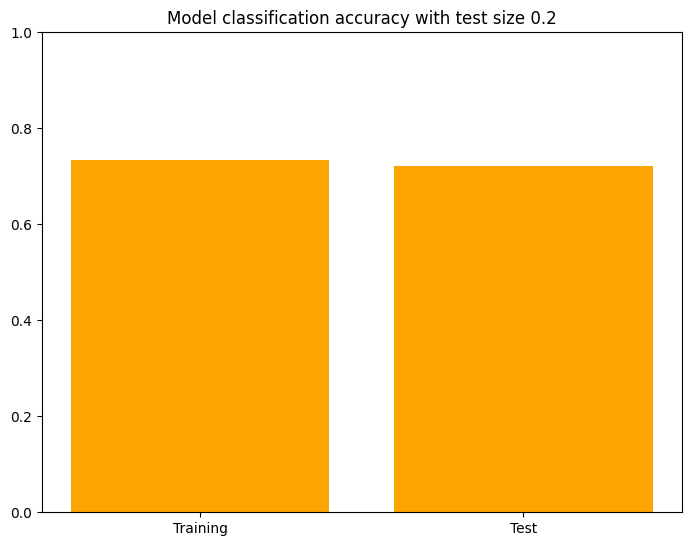



TEST SIZE: 0.25 
TRAINING SCORE: 0.7344497607655502 
TESTING SCORE: 0.7228195937873357


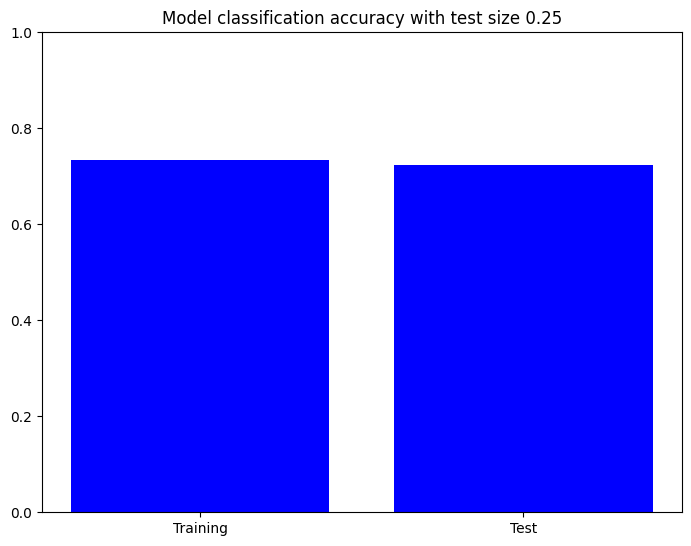



TEST SIZE: 0.3 
TRAINING SCORE: 0.7338744126441692 
TESTING SCORE: 0.7260956175298805


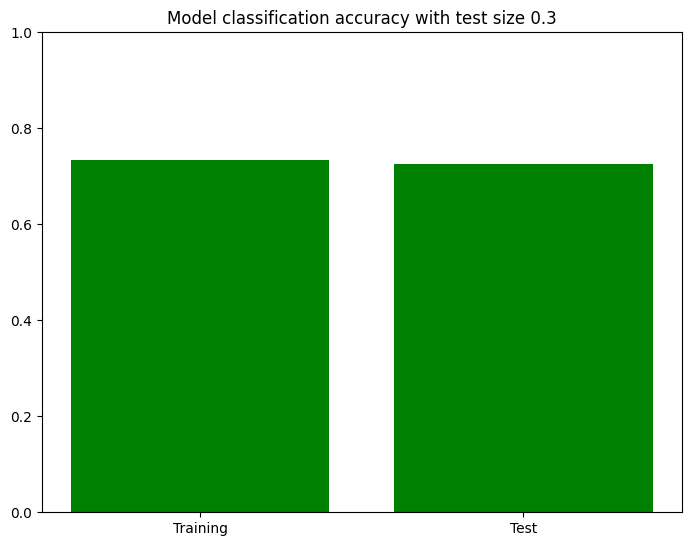



TEST SIZE: 0.4 
TRAINING SCORE: 0.7364225211758844 
TESTING SCORE: 0.7242152466367713


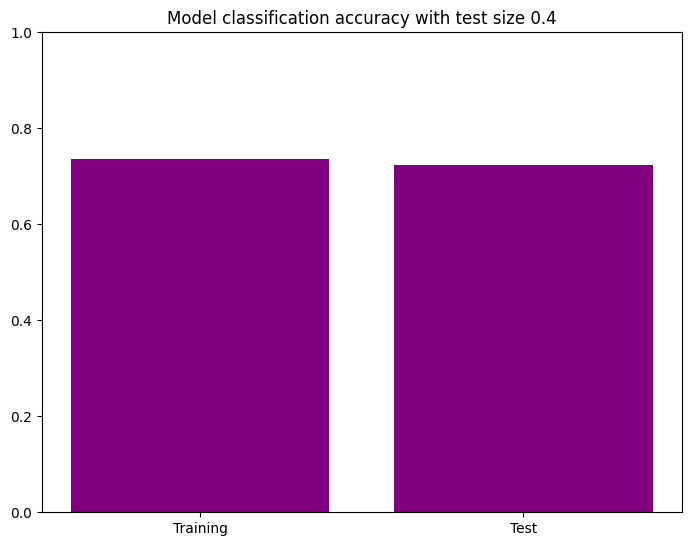



TEST SIZE: 0.5 
TRAINING SCORE: 0.7350478468899522 
TESTING SCORE: 0.7280334728033473


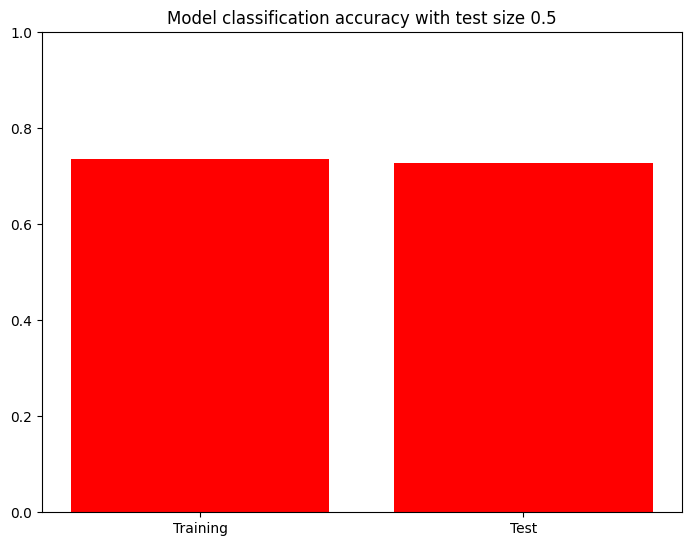

In [ ]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mp

#make model object
nbModel = CategoricalNB()

#make input and target arrays
alc_sugar = encoded_wine.iloc[:,1:3] #inputs
wine_colors = encoded_wine.iloc[:,0] #target

#array of the various test sizes
testSizes = [0.20,0.25, 0.30, 0.40, 0.50]
#array of colors to differentiate between different graphs
graphColors = ["orange", "blue", "green", "purple", "red"]
index = 0 #index for graphColors
#iterate over testSizes so we do not have to copy/past code for each test size
for i in testSizes:
  #split training and testing data according to the specified size
  as_train, as_test, c_train, c_test = train_test_split(alc_sugar, wine_colors, random_state=42, shuffle=True, test_size=i, stratify=wine_colors)
  #fit the model with training data
  nbModel.fit(as_train, c_train)
  #plotting model accuracy
  labels = ["Training","Test"] #plot labels
  #score the models with test data; the plot data will consist of these
  train_score = nbModel.score(as_train, c_train)
  test_score = nbModel.score(as_test, c_test)
  scores = [train_score, test_score]
  fig = mp.figure()
  ax = fig.add_axes([0,0,1,1])
  #graph title indicates test size
  title = "Model classification accuracy with test size "+ str(i)
  ax.set_title(title)
  #bars will have color from graphColors arr
  ax.bar(labels, scores, color=graphColors[index])
  index = index + 1 #increment index for graphColors
  ax.set_ylim(0, 1) #limit y axis
  #print test size and test and train score so the viewer can know actual values
  print("TEST SIZE:",i,"\nTRAINING SCORE:",train_score,"\nTESTING SCORE:",test_score)
  mp.show()
  print("\n")

We can see the following from the above: with every test size (so, 0.2, 0.25, 0.3, 0.4, and 0.5), the model's score for the training data will be approximately 0.73 and model's the score for the testing data will be approximately 0.72. This may be because, in this data set, there are such a limited amount of variables used to determine the target value, and the target value is limited to 2 possible options, so the model will remain fairly consistent regardless of the testing data size.

##Summary of the above
Based on the above analysis, a few conclusions may be drawn:<ul><li>First, according to the plots of the contingency tables:<ul><li>White wine occurs more frequently in the "Type" column than red wine does.</li><li>For red wine specifically:<ul><li>There are more red wines with low alcohol content than red wines with high alcohol content.</li><li>There are more red wines with low sugar content than red wines with high sugar content.</li></ul></li><li>For white wine specifically:<ul><li>There are more white wines with high alcohol content than white wines with low alcohol content.</li><li>There are more white wines with high sugar content than white wines with low sugar content.</li></ul></li></ul><li>Next, according to the probability calculations:<ul><li>In the entire data set, it is more likely that a wine is white than red.</li><li>In the whole data set, it is more likely that a wine has low alcohol content than high alcohol content.</li><li>In the whole data set, it is more likely that a wine has low sugar content than high sugar content.</li><li>Given that a wine is red, it is more likely that that wine has low alcohol content than high alcohol content.</li><li>Given that a wine is red, it is more likely that that wine has low sugar content thant high sugar content.</li></ul></li><li>Finally, from the NB model analysis:<ul><li>No matter the training data size, each iteration of the model produced approximately the same score, which was ~0.73 for the training data and ~0.72 for the testing data.</li></ul></li></ul>